In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
metadata_path = "D:\Data's\metadata.csv"
weather_path = "D:\Data's\weather.csv"
energy_path = "D:\Data's\electricity_cleaned.csv"
df = pd.read_csv(energy_path, index_col='timestamp', parse_dates=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2016-01-01 00:00:00 to 2017-12-31 23:00:00
Columns: 1578 entries, Panther_parking_Lorriane to Mouse_science_Micheal
dtypes: float64(1578)
memory usage: 211.3 MB


In [5]:
df.head()

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486


In [6]:
#building_name = 'Panther_office_Lois'
building_name ='Panther_office_Catherine'

In [7]:
df

,Panther_parking_Lorriane,Panther_lodging_Cora,Panther_office_Hannah,Panther_lodging_Hattie,Panther_education_Teofila,Panther_education_Jerome,Panther_retail_Felix,Panther_parking_Asia,Panther_education_Misty,Panther_retail_Gilbert,...,Cockatoo_public_Caleb,Cockatoo_education_Tyler,Cockatoo_public_Shad,Mouse_health_Buddy,Mouse_health_Modesto,Mouse_lodging_Vicente,Mouse_health_Justin,Mouse_health_Ileana,Mouse_health_Estela,Mouse_science_Micheal
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123.200,727.575,69.200,8.8224,370.0870,10.0,282.9965,26.0,135.0,168.2243
2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.475,731.200,66.275,17.6449,737.8260,30.0,574.9265,51.0,265.0,336.4486
2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,127.825,724.675,64.675,17.6449,729.9255,30.0,570.2780,50.0,272.0,336.4486
2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.475,737.375,65.875,17.6449,722.2620,20.0,561.1470,52.0,276.0,336.4486
2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.675,721.150,66.275,17.6449,719.1665,30.0,564.3695,50.0,280.0,336.4486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,15.4830,135.2261,3.4357,79.1353,105.6374,465.0898,67.0199,35.7069,16.3231,0.6401,...,96.925,704.950,111.350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 20:00:00,12.7224,135.9262,3.4087,81.6958,107.7348,463.6895,56.6869,35.7069,16.0831,0.7301,...,97.550,695.700,115.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 21:00:00,11.2822,135.1761,3.3546,82.8160,106.1295,461.2890,55.0576,35.5068,16.1631,0.7201,...,93.825,687.325,111.650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
office_data = pd.DataFrame(df[building_name].truncate(before='2017-01-01'))
office_data.interpolate(method='nearest')

,Panther_office_Catherine
timestamp,
2017-01-01 00:00:00,17.6434
2017-01-01 01:00:00,18.3635
2017-01-01 02:00:00,17.8435
2017-01-01 03:00:00,18.6836
2017-01-01 04:00:00,17.6834
...,...
2017-12-31 19:00:00,71.0937
2017-12-31 20:00:00,74.0543
2017-12-31 21:00:00,64.2524


In [9]:
office_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Panther_office_Catherine  8748 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [10]:
office_data.head()

,Panther_office_Catherine
timestamp,
2017-01-01 00:00:00,17.6434
2017-01-01 01:00:00,18.3635
2017-01-01 02:00:00,17.8435
2017-01-01 03:00:00,18.6836
2017-01-01 04:00:00,17.6834


<Axes: xlabel='timestamp'>

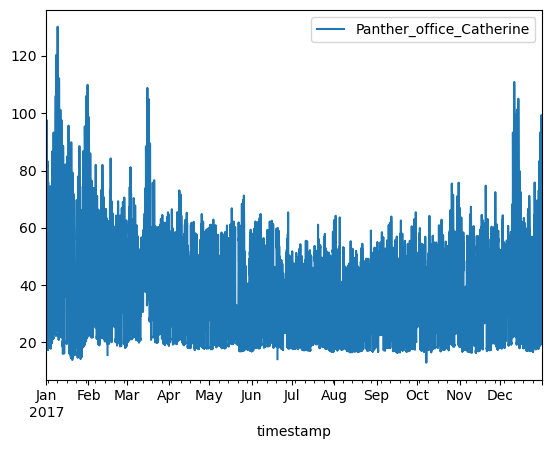

In [11]:
office_data.plot()

In [12]:
weather_data = pd.read_csv(weather_path, index_col='timestamp', parse_dates=True)

In [13]:
weather_data.head()

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2016-01-01 00:00:00,Panther,19.4,NaN,19.4,0.0,NaN,NaN,0.0,0.0
2016-01-01 01:00:00,Panther,21.1,6.0,21.1,-1.0,NaN,1019.4,0.0,0.0
2016-01-01 02:00:00,Panther,21.1,NaN,21.1,0.0,NaN,1018.8,210.0,1.5
2016-01-01 03:00:00,Panther,20.6,NaN,20.0,0.0,NaN,1018.1,0.0,0.0
2016-01-01 04:00:00,Panther,21.1,NaN,20.6,0.0,NaN,1019.0,290.0,1.5


In [14]:
weather_site = weather_data[weather_data.site_id == 'Panther'].truncate(before='2017-01-01')

In [15]:
weather_site=weather_site.fillna(method='ffill')

In [16]:
weather_site.head()

,site_id,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,,
2017-01-01 00:00:00,Panther,15.6,2.0,12.8,0.0,NaN,1022.1,130.0,2.1
2017-01-01 01:00:00,Panther,15.0,0.0,12.8,0.0,NaN,1021.7,150.0,1.5
2017-01-01 02:00:00,Panther,15.0,2.0,13.3,0.0,NaN,1021.6,0.0,0.0
2017-01-01 03:00:00,Panther,13.3,0.0,12.2,0.0,NaN,1021.4,0.0,0.0
2017-01-01 04:00:00,Panther,12.2,4.0,11.7,0.0,NaN,1021.4,0.0,0.0


In [17]:
weather_site.shape

(8760, 9)

In [18]:
number_data = weather_site.select_dtypes(include='number')
weather_hourly = number_data.resample("H").mean()



In [19]:
weather_hourly.head()

,airTemperature,cloudCoverage,dewTemperature,precipDepth1HR,precipDepth6HR,seaLvlPressure,windDirection,windSpeed
timestamp,,,,,,,,
2017-01-01 00:00:00,15.6,2.0,12.8,0.0,NaN,1022.1,130.0,2.1
2017-01-01 01:00:00,15.0,0.0,12.8,0.0,NaN,1021.7,150.0,1.5
2017-01-01 02:00:00,15.0,2.0,13.3,0.0,NaN,1021.6,0.0,0.0
2017-01-01 03:00:00,13.3,0.0,12.2,0.0,NaN,1021.4,0.0,0.0
2017-01-01 04:00:00,12.2,4.0,11.7,0.0,NaN,1021.4,0.0,0.0


In [20]:
weather_hourly.shape

(8760, 8)

In [21]:
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   airTemperature  8760 non-null   float64
 1   cloudCoverage   8760 non-null   float64
 2   dewTemperature  8760 non-null   float64
 3   precipDepth1HR  8760 non-null   float64
 4   precipDepth6HR  8699 non-null   float64
 5   seaLvlPressure  8760 non-null   float64
 6   windDirection   8760 non-null   float64
 7   windSpeed       8760 non-null   float64
dtypes: float64(8)
memory usage: 615.9 KB


In [22]:
weather_hourly2 = weather_hourly[weather_hourly > -10]


In [23]:
weather_hourly3 = weather_hourly2.fillna(method='ffill')

In [24]:
temperature = weather_hourly3["airTemperature"]

In [25]:
temperature.head()

timestamp
2017-01-01 00:00:00    15.6
2017-01-01 01:00:00    15.0
2017-01-01 02:00:00    15.0
2017-01-01 03:00:00    13.3
2017-01-01 04:00:00    12.2
Freq: H, Name: airTemperature, dtype: float64

<Axes: xlabel='timestamp'>

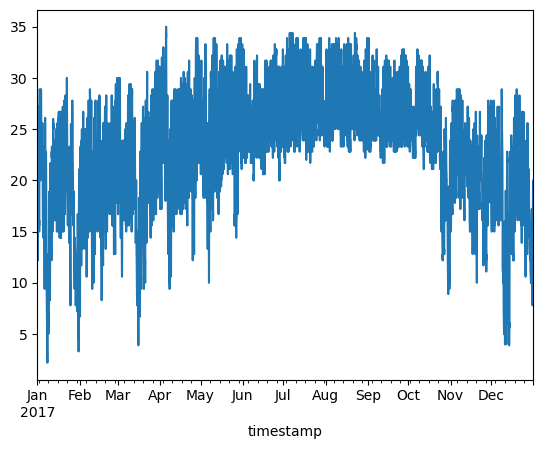

In [26]:
temperature.plot()

In [27]:
training_months = [1,2,3,4,5,6,7,8,9]
test_months = [10,11]

In [28]:
a=office_data.index.month.isin(training_months)
len(a[a==True])

6552

In [29]:
a

array([ True,  True,  True, ..., False, False, False])

In [30]:
train = office_data[office_data.index.month.isin(training_months)]
test = office_data[office_data.index.month.isin(test_months)]

In [31]:
train

,Panther_office_Catherine
timestamp,
2017-01-01 00:00:00,17.6434
2017-01-01 01:00:00,18.3635
2017-01-01 02:00:00,17.8435
2017-01-01 03:00:00,18.6836
2017-01-01 04:00:00,17.6834
...,...
2017-09-30 19:00:00,44.0085
2017-09-30 20:00:00,42.5682
2017-09-30 21:00:00,46.2889


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6552 entries, 2017-01-01 00:00:00 to 2017-09-30 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Panther_office_Catherine  6540 non-null   float64
dtypes: float64(1)
memory usage: 102.4 KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1464 entries, 2017-10-01 00:00:00 to 2017-11-30 23:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Panther_office_Catherine  1464 non-null   float64
dtypes: float64(1)
memory usage: 22.9 KB


In [34]:
train_features = pd.concat([pd.get_dummies(train.index.hour), 
                                     pd.get_dummies(train.index.dayofweek), 
                                     pd.DataFrame(temperature[temperature.index.month.isin(training_months)].values)], axis=1).dropna()

In [35]:
a=temperature[temperature.index.month.isin(training_months)].values
len(a)

6552

In [36]:
train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,0,1,2,3,4,5,6,0
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,15.6
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,15.0
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,15.0
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,13.3
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,12.2


In [37]:
train["Panther_office_Catherine"]

timestamp
2017-01-01 00:00:00    17.6434
2017-01-01 01:00:00    18.3635
2017-01-01 02:00:00    17.8435
2017-01-01 03:00:00    18.6836
2017-01-01 04:00:00    17.6834
                        ...   
2017-09-30 19:00:00    44.0085
2017-09-30 20:00:00    42.5682
2017-09-30 21:00:00    46.2889
2017-09-30 22:00:00    50.1297
2017-09-30 23:00:00    32.2062
Name: Panther_office_Catherine, Length: 6552, dtype: float64

In [38]:
X_train= train_features
Y_train= train["Panther_office_Catherine"]

In [39]:
Y_train

timestamp
2017-01-01 00:00:00    17.6434
2017-01-01 01:00:00    18.3635
2017-01-01 02:00:00    17.8435
2017-01-01 03:00:00    18.6836
2017-01-01 04:00:00    17.6834
                        ...   
2017-09-30 19:00:00    44.0085
2017-09-30 20:00:00    42.5682
2017-09-30 21:00:00    46.2889
2017-09-30 22:00:00    50.1297
2017-09-30 23:00:00    32.2062
Name: Panther_office_Catherine, Length: 6552, dtype: float64

In [40]:
train=train.fillna(method='ffill')

# KNeighbors Regressor

In [41]:
model = KNeighborsRegressor().fit(np.array(train_features), np.array(train.values));

In [42]:
X_train= np.array(train_features)
X_train

array([[True, False, False, ..., False, True, 15.6],
       [False, True, False, ..., False, True, 15.0],
       [False, False, True, ..., False, True, 15.0],
       ...,
       [False, False, False, ..., True, False, 24.4],
       [False, False, False, ..., True, False, 23.9],
       [False, False, False, ..., True, False, 23.9]], dtype=object)

In [43]:
Y_train= np.array(train.values)
Y_train

array([[17.6434],
       [18.3635],
       [17.8435],
       ...,
       [46.2889],
       [50.1297],
       [32.2062]])

In [44]:
test_features = np.array(pd.concat([pd.get_dummies(test.index.hour),
                                    pd.get_dummies(test.index.dayofweek),
                                    pd.DataFrame(temperature[temperature.index.month.isin(test_months)].values)], axis=1).dropna())

In [45]:
X_test= np.array(test_features)

In [46]:
predictions = model.predict(test_features)

In [47]:
Y_test=np.array(test.values)

In [48]:
predicted_vs_actual = pd.concat([test, pd.DataFrame(predictions, index=test.index)], axis=1)

In [49]:
predicted_vs_actual.columns = ["Actual", "Predicted"]

In [50]:
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2017-10-01 00:00:00,25.2849,18.99566
2017-10-01 01:00:00,25.5249,19.31576
2017-10-01 02:00:00,25.6049,19.18768
2017-10-01 03:00:00,25.8450,19.23570
2017-10-01 04:00:00,25.6049,19.13172


<Axes: ylabel='Density'>

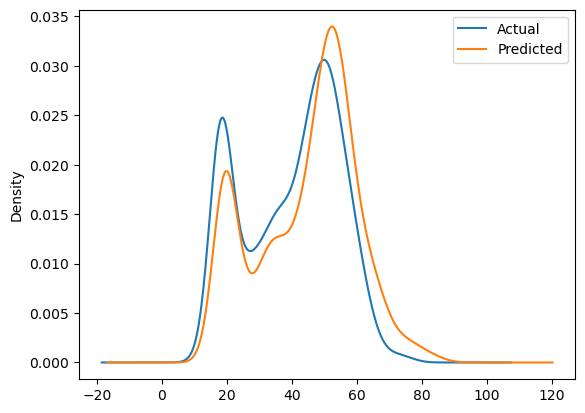

In [51]:
predicted_vs_actual.plot(kind='kde')

In [52]:
train.columns = ["Actual"]

In [53]:
predicted_vs_actual_plus_training = pd.concat([train, predicted_vs_actual], sort=True)

In [54]:
predicted_vs_actual_plus_training

,Actual,Predicted
timestamp,,
2017-01-01 00:00:00,17.6434,NaN
2017-01-01 01:00:00,18.3635,NaN
2017-01-01 02:00:00,17.8435,NaN
2017-01-01 03:00:00,18.6836,NaN
2017-01-01 04:00:00,17.6834,NaN
...,...,...
2017-11-30 19:00:00,47.8092,64.62046
2017-11-30 20:00:00,49.2095,66.63688
2017-11-30 21:00:00,51.4099,69.24536


<Axes: ylabel='Density'>

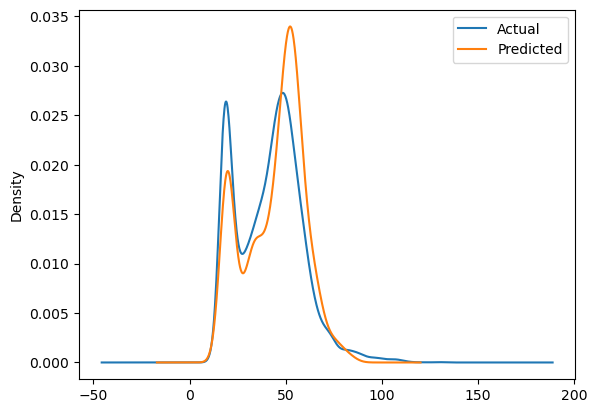

In [55]:
predicted_vs_actual_plus_training.plot(kind='kde')

In [56]:

errors = abs(predicted_vs_actual['Predicted'] - predicted_vs_actual['Actual'])
E = 100 * np.mean((errors / predicted_vs_actual['Actual']))
E

21.704806043144885

# From executing KNeighbours Regressor, we have obtained an accuracy of 78.295% i.e., it has an error of 21.704%

# random_forest

In [57]:

random_forest=RandomForestRegressor().fit(np.array(train_features), np.array(train.values))
#random_forest
predictions = random_forest.predict(np.array(test_features))
#acc_random_forest = round(random_forest.score(np.array(train_features), np.array(train.values)) * 100, 2)
#acc_random_forest

C:\Users\Karthik\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [58]:
predicted_vs_actual = pd.concat([test, pd.DataFrame(predictions, index=test.index)], axis=1)
predicted_vs_actual.columns = ["Actual", "Predicted"]

In [59]:
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2017-10-01 00:00:00,25.2849,17.652165
2017-10-01 01:00:00,25.5249,20.416939
2017-10-01 02:00:00,25.6049,20.169928
2017-10-01 03:00:00,25.8450,19.636343
2017-10-01 04:00:00,25.6049,18.952358


In [60]:
test

,Panther_office_Catherine
timestamp,
2017-10-01 00:00:00,25.2849
2017-10-01 01:00:00,25.5249
2017-10-01 02:00:00,25.6049
2017-10-01 03:00:00,25.8450
2017-10-01 04:00:00,25.6049
...,...
2017-11-30 19:00:00,47.8092
2017-11-30 20:00:00,49.2095
2017-11-30 21:00:00,51.4099


<Axes: ylabel='Density'>

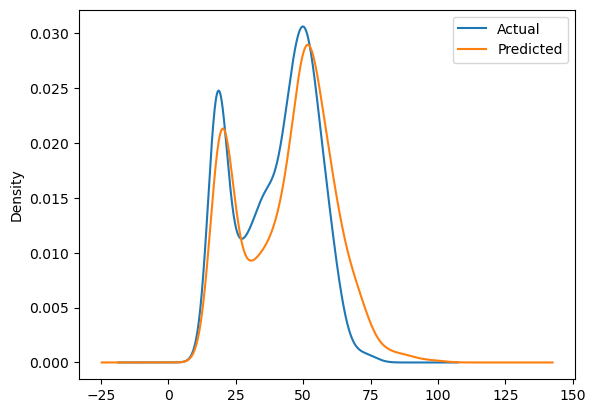

In [61]:
predicted_vs_actual.plot(kind='kde')

In [62]:
train.columns = ["Actual"]
predicted_vs_actual_plus_training = pd.concat([train, predicted_vs_actual], sort=True)

In [63]:
predicted_vs_actual_plus_training

,Actual,Predicted
timestamp,,
2017-01-01 00:00:00,17.6434,NaN
2017-01-01 01:00:00,18.3635,NaN
2017-01-01 02:00:00,17.8435,NaN
2017-01-01 03:00:00,18.6836,NaN
2017-01-01 04:00:00,17.6834,NaN
...,...,...
2017-11-30 19:00:00,47.8092,59.448360
2017-11-30 20:00:00,49.2095,70.327800
2017-11-30 21:00:00,51.4099,60.935164


In [64]:
predicted_vs_actual

,Actual,Predicted
timestamp,,
2017-10-01 00:00:00,25.2849,17.652165
2017-10-01 01:00:00,25.5249,20.416939
2017-10-01 02:00:00,25.6049,20.169928
2017-10-01 03:00:00,25.8450,19.636343
2017-10-01 04:00:00,25.6049,18.952358
...,...,...
2017-11-30 19:00:00,47.8092,59.448360
2017-11-30 20:00:00,49.2095,70.327800
2017-11-30 21:00:00,51.4099,60.935164


<Axes: ylabel='Density'>

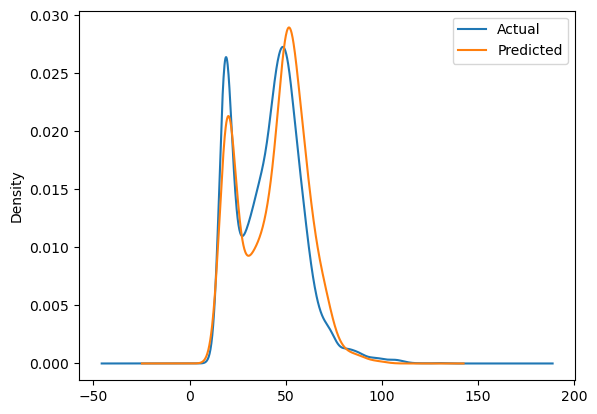

In [65]:
predicted_vs_actual_plus_training.plot(kind='kde')

In [66]:

errors = abs(predicted_vs_actual['Predicted'] - predicted_vs_actual['Actual'])
E = 100 * np.mean((errors / predicted_vs_actual['Actual']))
E

18.676324502420254

# By executing Random Forest, we have obtained an error of 18.676% which means that an accuracy of 81.324% is attained.

# Stochastic Gradient Descent

In [67]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(np.array(train_features), Y_train.ravel())
Y_pred = sgd_regressor.predict(np.array(X_test))


In [68]:
predicted_vs_actual1 = pd.concat([test, pd.DataFrame(Y_pred, index=test.index)], axis=1)
predicted_vs_actual1.columns = ["Actual", "Predicted"]

In [69]:
predicted_vs_actual1.head()

,Actual,Predicted
timestamp,,
2017-10-01 00:00:00,25.2849,12.827367
2017-10-01 01:00:00,25.5249,12.998806
2017-10-01 02:00:00,25.6049,12.625468
2017-10-01 03:00:00,25.8450,12.091021
2017-10-01 04:00:00,25.6049,11.467989


In [70]:
train.columns = ["Actual"]
predicted_vs_actual1_plus_training = pd.concat([train, predicted_vs_actual1], sort=True)
predicted_vs_actual1_plus_training

,Actual,Predicted
timestamp,,
2017-01-01 00:00:00,17.6434,NaN
2017-01-01 01:00:00,18.3635,NaN
2017-01-01 02:00:00,17.8435,NaN
2017-01-01 03:00:00,18.6836,NaN
2017-01-01 04:00:00,17.6834,NaN
...,...,...
2017-11-30 19:00:00,47.8092,55.791888
2017-11-30 20:00:00,49.2095,61.089688
2017-11-30 21:00:00,51.4099,62.222700


<Axes: ylabel='Density'>

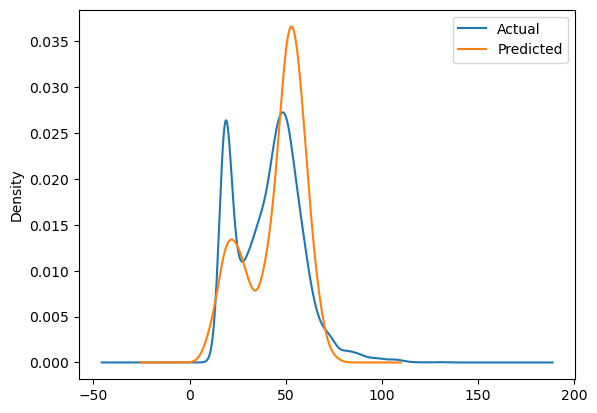

In [71]:
predicted_vs_actual1_plus_training.plot(kind='kde')

In [72]:
errors = abs(predicted_vs_actual1['Predicted'] - predicted_vs_actual1['Actual'])
E = 100 * np.mean((errors / predicted_vs_actual1['Actual']))
E

22.442539059699595

# We see that an accuracy of 77.5575% is obtained by executing Stochastic Gradient Descent. i.e., an error of 22.4425% is attained.

# Decision Tree

In [73]:
"""decision_tree = DecisionTreeClassifier()
decision_tree.fit(np.array(train_features), Y_train.ravel())
Y_pred = decision_tree.predict(np.array(X_test))"""
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(np.array(train_features), Y_train.ravel())
Y_pred2 = decision_tree.predict(np.array(X_test))

In [74]:
predicted_vs_actual2 = pd.concat([test, pd.DataFrame(Y_pred2, index=test.index)], axis=1)
predicted_vs_actual2.columns = ["Actual", "Predicted"]

In [75]:
train.columns = ["Actual"]
predicted_vs_actual2_plus_training = pd.concat([train, predicted_vs_actual2], sort=True)
predicted_vs_actual2_plus_training

,Actual,Predicted
timestamp,,
2017-01-01 00:00:00,17.6434,NaN
2017-01-01 01:00:00,18.3635,NaN
2017-01-01 02:00:00,17.8435,NaN
2017-01-01 03:00:00,18.6836,NaN
2017-01-01 04:00:00,17.6834,NaN
...,...,...
2017-11-30 19:00:00,47.8092,60.745033
2017-11-30 20:00:00,49.2095,71.153750
2017-11-30 21:00:00,51.4099,56.851000


<Axes: ylabel='Density'>

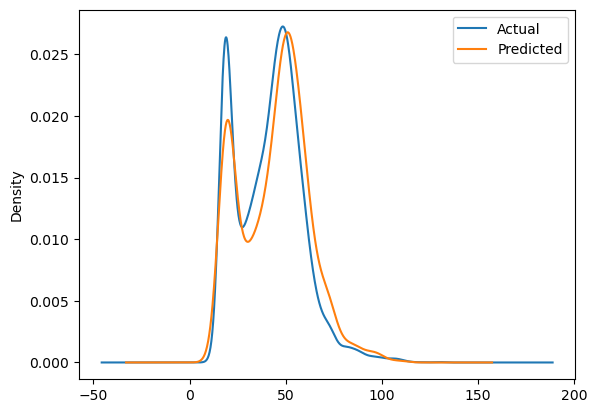

In [76]:
predicted_vs_actual2_plus_training.plot(kind='kde')

In [77]:
errors = abs(predicted_vs_actual2['Predicted'] - predicted_vs_actual2['Actual'])
E = 100 * np.mean((errors / predicted_vs_actual2['Actual']))
E

20.46834403443668

# We observe an accuracy of 79.532% by implementing Decision Tree model, i.e., an error of 20.468%.

In [78]:
#X_train=pd.DataFrame(train_features.astype(float))
X_train=np.array(train_features)
X_train

array([[True, False, False, ..., False, True, 15.6],
       [False, True, False, ..., False, True, 15.0],
       [False, False, True, ..., False, True, 15.0],
       ...,
       [False, False, False, ..., True, False, 24.4],
       [False, False, False, ..., True, False, 23.9],
       [False, False, False, ..., True, False, 23.9]], dtype=object)

In [79]:
#Y_train=pd.DataFrame(train.astype(float))
Y_train=np.array(train.values)
Y_train

array([[17.6434],
       [18.3635],
       [17.8435],
       ...,
       [46.2889],
       [50.1297],
       [32.2062]])

In [80]:
#X_test=pd.DataFrame(test_features.astype(float))
X_test=np.array(test_features)
X_test

array([[True, False, False, ..., False, True, 23.9],
       [False, True, False, ..., False, True, 23.3],
       [False, False, True, ..., False, True, 23.3],
       ...,
       [False, False, False, ..., False, False, 18.9],
       [False, False, False, ..., False, False, 18.3],
       [False, False, False, ..., False, False, 17.2]], dtype=object)

In [81]:
#Y_test=pd.DataFrame(test.values.astype(float))
Y_test=np.array(test)
Y_test

array([[25.2849],
       [25.5249],
       [25.6049],
       ...,
       [51.4099],
       [50.6898],
       [34.2466]])

In [82]:
X_train.shape

(6552, 32)

# LSTM Using PyTorch

In [87]:
X_train=(train_features)
y_train=(train)
X_test=(test_features)
y_test=(test)

In [88]:
print("X-train-shape-" + str(X_train.shape) +\
      "\ny_train_Shape-" + str(y_train.shape) +\
      "\nX-test-shape-" + str(X_test.shape) +\
      "\ny_train_Shape-" + str(y_test.shape))


X-train-shape-(6552, 32)
y_train_Shape-(6552, 1)
X-test-shape-(1464, 32)
y_train_Shape-(1464, 1)


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = np.array(X_train) if not isinstance(X_train, np.ndarray) else X_train
X_test = np.array(X_test) if not isinstance(X_test, np.ndarray) else X_test
y_train = np.array(y_train) if not isinstance(y_train, np.ndarray) else y_train
y_test = np.array(y_test) if not isinstance(y_test, np.ndarray) else y_test

if y_train.ndim == 1:
    y_train = y_train.reshape(-1, 1)
if y_test.ndim == 1:
    y_test = y_test.reshape(-1, 1)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [90]:
X_train

array([[ 1.        , -1.        , -1.        , ..., -1.        ,
         1.        , -0.18292683],
       [-1.        ,  1.        , -1.        , ..., -1.        ,
         1.        , -0.2195122 ],
       [-1.        , -1.        ,  1.        , ..., -1.        ,
         1.        , -0.2195122 ],
       ...,
       [-1.        , -1.        , -1.        , ...,  1.        ,
        -1.        ,  0.35365854],
       [-1.        , -1.        , -1.        , ...,  1.        ,
        -1.        ,  0.32317073],
       [-1.        , -1.        , -1.        , ...,  1.        ,
        -1.        ,  0.32317073]])

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6552, 32), (1464, 32), (6552, 1), (1464, 1))

In [92]:
X_train = X_train.reshape((-1, 32, 1))
X_test = X_test.reshape((-1, 32, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6552, 32, 1), (1464, 32, 1), (6552, 1), (1464, 1))

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [94]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6552, 32, 1]),
 torch.Size([1464, 32, 1]),
 torch.Size([6552, 1]),
 torch.Size([1464, 1]))

In [96]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [97]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [98]:
train_dataset

In [99]:
from torch.utils.data import DataLoader

batch_size = 8

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [100]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([8, 32, 1]) torch.Size([8, 1])


In [101]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 64, 5)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 64, num_layers=5, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [102]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [137]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [138]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.119
Batch 200, Loss: 0.091
Batch 300, Loss: 0.091
Batch 400, Loss: 0.091
Batch 500, Loss: 0.092
Batch 600, Loss: 0.083
Batch 700, Loss: 0.062
Batch 800, Loss: 0.050

Val Loss: 0.031
***************************************************

Epoch: 2
Batch 100, Loss: 0.048
Batch 200, Loss: 0.050
Batch 300, Loss: 0.039
Batch 400, Loss: 0.047
Batch 500, Loss: 0.060
Batch 600, Loss: 0.046
Batch 700, Loss: 0.045
Batch 800, Loss: 0.050

Val Loss: 0.026
***************************************************

Epoch: 3
Batch 100, Loss: 0.043
Batch 200, Loss: 0.047
Batch 300, Loss: 0.052
Batch 400, Loss: 0.046
Batch 500, Loss: 0.046
Batch 600, Loss: 0.047
Batch 700, Loss: 0.043
Batch 800, Loss: 0.047

Val Loss: 0.024
***************************************************

Epoch: 4
Batch 100, Loss: 0.042
Batch 200, Loss: 0.043
Batch 300, Loss: 0.043
Batch 400, Loss: 0.047
Batch 500, Loss: 0.046
Batch 600, Loss: 0.042
Batch 700, Loss: 0.036
Batch 800, Loss: 0.043

Val Loss: 0.035
*

# The error obtained by implementing the LSTM model using PyTorch is 2% after 10 epochs, i.e., an accuracy of 98%.

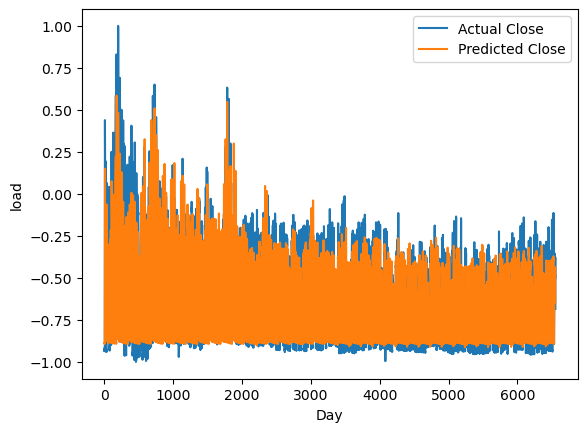

In [141]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('load')
plt.legend()
plt.show()

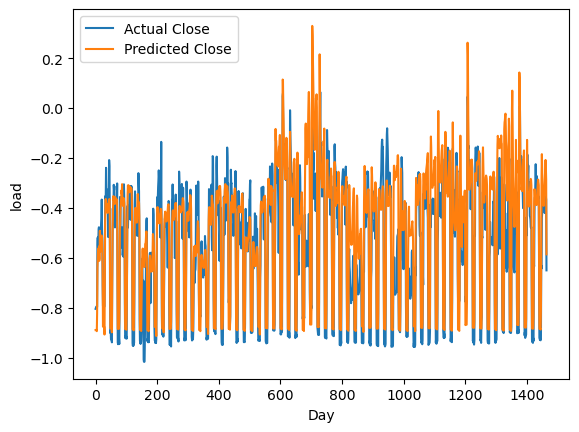

In [142]:
with torch.no_grad():
    predicted = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('load')
plt.legend()
plt.show()

# Transformer

C:\Users\Karthik\anaconda3\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1: Train loss 3.7577, Test loss 2.4239
Epoch 2: Train loss 2.3740, Test loss 2.3177
Epoch 3: Train loss 2.3434, Test loss 2.3154
Epoch 4: Train loss 2.3448, Test loss 2.3150
Epoch 5: Train loss 2.3479, Test loss 2.3105
Epoch 6: Train loss 2.3373, Test loss 2.3196
Epoch 7: Train loss 2.3366, Test loss 2.3144
Epoch 8: Train loss 2.3345, Test loss 2.3308
Epoch 9: Train loss 2.3318, Test loss 2.3299
Epoch 10: Train loss 2.3266, Test loss 2.3211


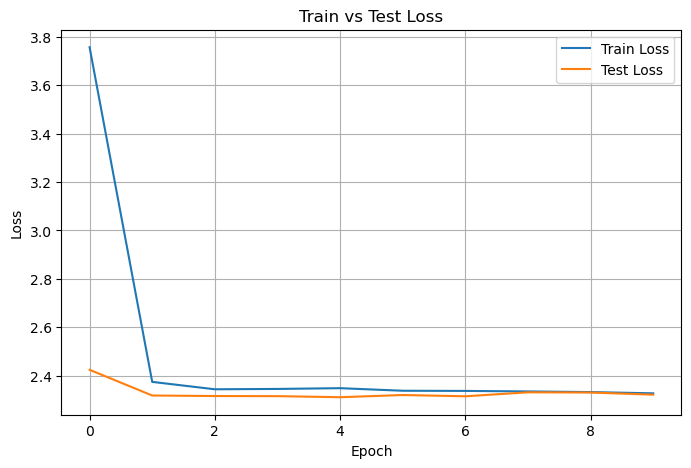

In [121]:
import torch
import torch.nn as nn
import math
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

class TransformerModel(nn.Module):
    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.model_type = 'Transformer'
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = nn.TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()

    def forward(self, src, src_mask=None):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx].clone().detach(), self.y[idx].clone().detach()

ntokens = 10  
ninp = 512
nhead = 8
nhid = 512
nlayers = 6
dropout = 0.1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = TransformerModel(ntokens, ninp, nhead, nhid, nlayers, dropout).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # Consider adjusting learning rate

X_train, y_train = torch.randint(0, ntokens, (1000, 30)), torch.randint(0, ntokens, (1000, 30))
X_test, y_test = torch.randint(0, ntokens, (200, 30)), torch.randint(0, ntokens, (200, 30))
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output.view(-1, ntokens), y_batch.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output.view(-1, ntokens), y_batch.view(-1))
            total_loss += loss.item()
    return total_loss / len(test_loader)

train_losses = []
test_losses = []
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion, device)
    test_loss = evaluate(model, test_loader, criterion, device)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    print(f'Epoch {epoch+1}: Train loss {train_loss:.4f}, Test loss {test_loss:.4f}')


plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.grid(True)
plt.show()
